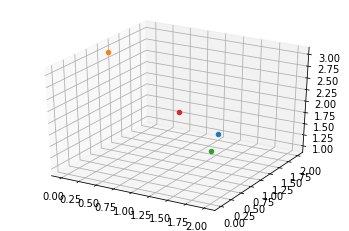

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

first = np.array((1, 2, 1))
second = np.array((0, 1, 3))
third = np.array((2, 0, 2))
fourth = np.array((1, 1, 2))

ax.scatter(1, 2, 1)
ax.scatter(0, 1, 3)
ax.scatter(2, 0, 2)
ax.scatter(1, 1, 2)

temp = [first, second, third, fourth]

plt.show()

In [16]:
for i in range(len(temp)):
    for j in range(len(temp)):
        if i == j:
            break
        print('point1: ', temp[i])
        print('point2: ', temp[j])
        print(np.linalg.norm(temp[i] - temp[j]))
        print(np.linalg.norm(temp[i] - temp[j]) ** 2)
        print(np.linalg.norm(temp[i] - temp[j], ord=np.inf))
        print(np.linalg.norm(temp[i] - temp[j], ord=1))

point1:  [0 1 3]
point2:  [1 2 1]
2.449489742783178
5.999999999999999
2.0
4.0
point1:  [2 0 2]
point2:  [1 2 1]
2.449489742783178
5.999999999999999
2.0
4.0
point1:  [2 0 2]
point2:  [0 1 3]
2.449489742783178
5.999999999999999
2.0
4.0
point1:  [1 1 2]
point2:  [1 2 1]
1.4142135623730951
2.0000000000000004
1.0
2.0
point1:  [1 1 2]
point2:  [0 1 3]
1.4142135623730951
2.0000000000000004
1.0
2.0
point1:  [1 1 2]
point2:  [2 0 2]
1.4142135623730951
2.0000000000000004
1.0
2.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 4), (23, 4), (127,), (23,))

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
82,5.8,2.7,3.9,1.2
130,7.4,2.8,6.1,1.9
146,6.3,2.5,5.0,1.9
17,5.1,3.5,1.4,0.3
106,4.9,2.5,4.5,1.7


In [20]:
y_train.head()

82     versicolor
130     virginica
146     virginica
17         setosa
106     virginica
Name: species, dtype: object

In [21]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa'], dtype=object)

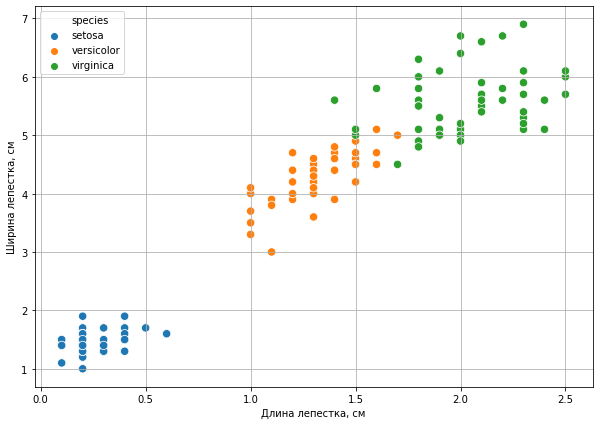

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [23]:
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 1.0


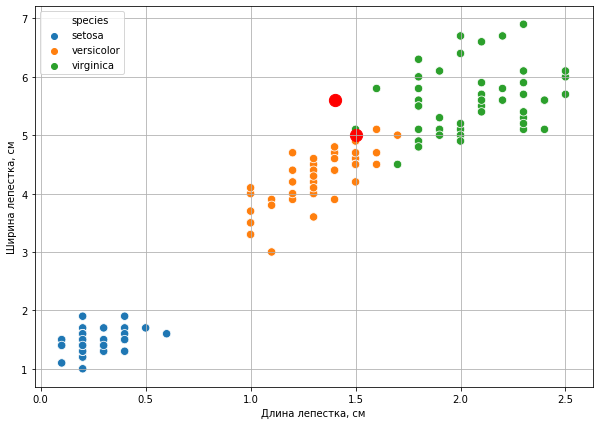

In [26]:
iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [27]:
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.913


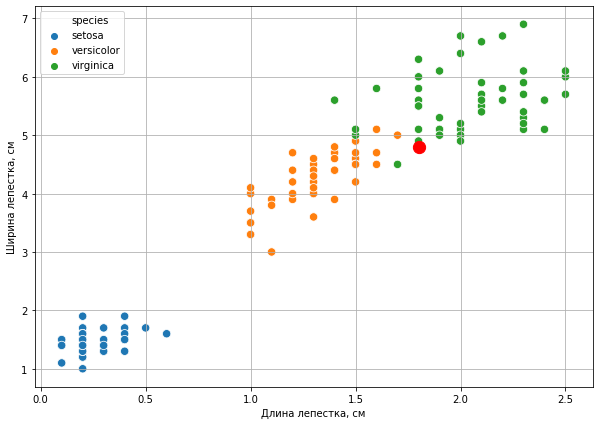

In [28]:
iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [29]:
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

accuracy: 0.957


In [30]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'карий': 5, 'болотный': 1, 'синий': 2},
            {'синий': 1, 'болотный': 3, 'темный': 2},
            {'темный': 4, 'карий': 2, 'синий': 3},
            {'болотный': 1, 'синий': 1, 'зеленый': 6}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[1., 0., 5., 2., 0.],
       [3., 0., 0., 1., 2.],
       [0., 0., 2., 3., 4.],
       [1., 6., 0., 1., 0.]])